<a href="/assets/lecture04_code.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/lecture04/code.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
הרצאה 4 - סיווג גנרטיבי
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)
import tabulate  # A package from pretty printing tables
from graphviz import Digraph  # A package for plothing graphs (of nodes and edges)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Markdown

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

## Credit Card Fraud Detection

In [ ]:
rand_gen = np.random.RandomState(1)

x = np.concatenate((
        rand_gen.randn(200, 2) * 18 + 54,
        rand_gen.randn(25, 2) * 7.2 + 27,
        rand_gen.randn(25, 2) * 7.2 + 81,
    ), axis=0)

y = np.concatenate((np.zeros(200, dtype=bool), np.ones(50, dtype=bool)))

x_grid = np.stack(np.meshgrid(np.linspace(0, 100, 300), np.linspace(0, 100, 300)), axis=2)

In [ ]:
from matplotlib.colors import ListedColormap
def plot_grid_predict(ax, h, x_grid):
    cmap = ListedColormap(plt.cm.tab10([0, 1]))
    grid_predict = h(x_grid.reshape(-1, 2)).reshape(x_grid.shape[:2])
    img_obj = ax.imshow(grid_predict, extent=[0, 100, 0, 100],
              origin='lower',
              cmap=cmap,
              alpha=0.2,
              interpolation='nearest',
              zorder=-1,
              )
    return img_obj

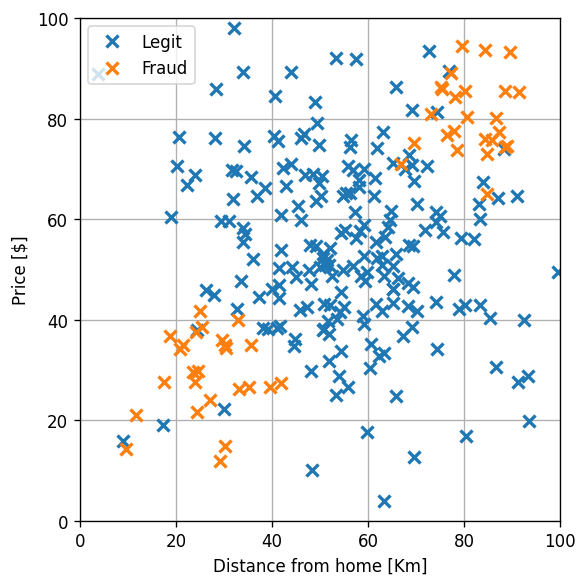

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x[~y, 0], x[~y, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x[y, 0], x[y, 1], 'x', label='Fraud', ms=7, mew=2)
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
fig.savefig('./output/transactions_dataset.png', dpi=240)

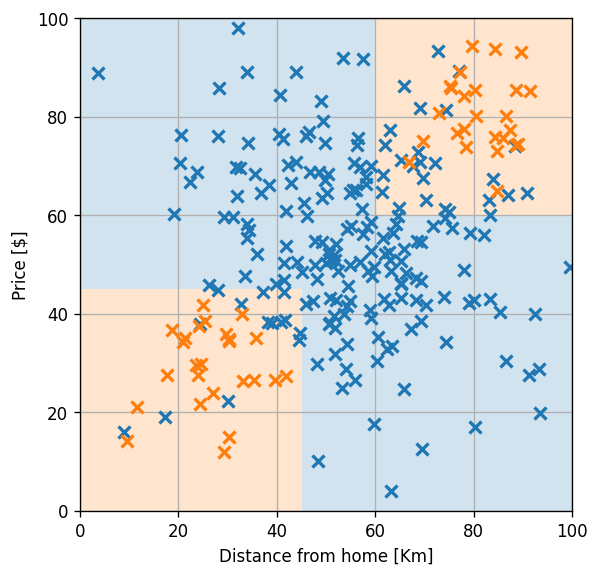

In [ ]:
h = lambda x: ((x[:, 0] < 45) & (x[:, 1] < 45)) | ((x[:, 0] > 60) & (x[:, 1] > 60))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x[~y, 0], x[~y, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x[y, 0], x[y, 1], 'x', label='Fraud', ms=7, mew=2)
plot_grid_predict(ax, h, x_grid)
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
fig.savefig('./output/transactions_example.png', dpi=240)

### Train-Test Split

In [ ]:
n_samples = x.shape[0]

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(1)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 80% train / 20% test
n_samples_train = int(n_samples * 0.8)
train_indices = indices[:n_samples_train]
test_indices = indices[n_samples_train:]

x_train = x[train_indices]
y_train = y[train_indices]
x_test = x[test_indices]
y_test = y[test_indices]

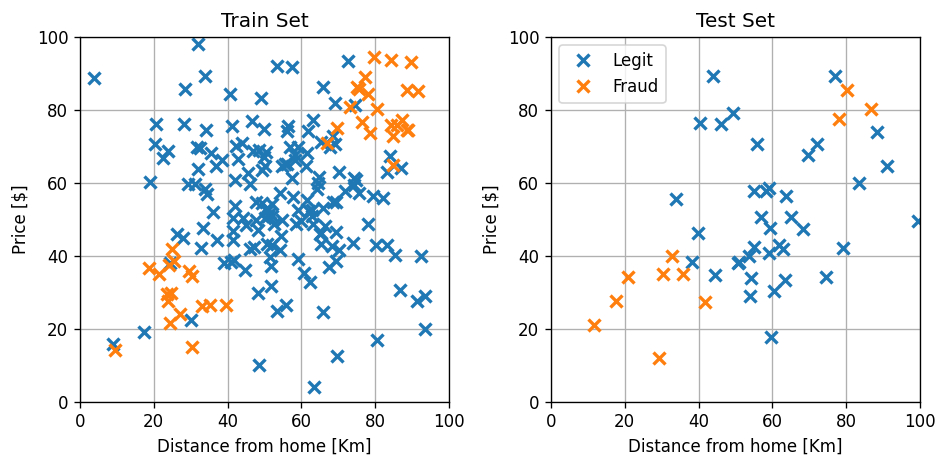

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

ax = axes[0]
ax.plot(x_train[~y_train, 0], x_train[~y_train, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_train[y_train, 0], x_train[y_train, 1], 'x', label='Fraud', ms=7, mew=2)
ax.set_title('Train Set')
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()

ax = axes[1]
ax.plot(x_test[~y_test, 0], x_test[~y_test, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_test[y_test, 0], x_test[y_test, 1], 'x', label='Fraud', ms=7, mew=2)
ax.set_title('Test Set')
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')

fig.savefig('./output/transactions_train_test.png', dpi=240)

## 1-NN

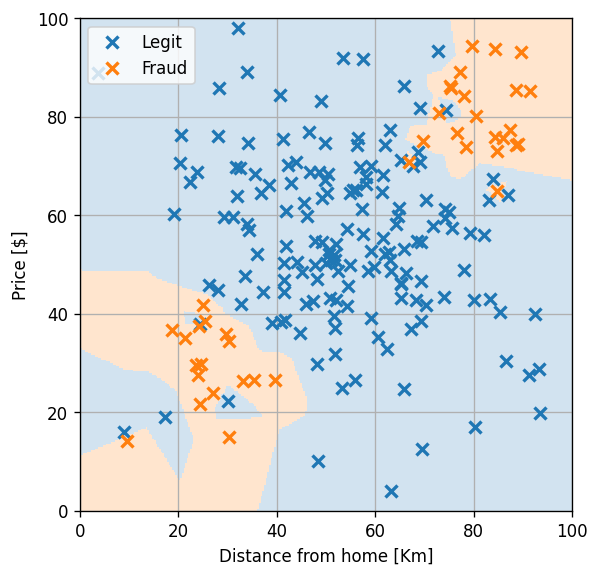

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
h = lambda x: knn.predict(x)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_train[~y_train, 0], x_train[~y_train, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_train[y_train, 0], x_train[y_train, 1], 'x', label='Fraud', ms=7, mew=2)
plot_grid_predict(ax, h, x_grid)
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
fig.savefig('./output/transactions_1_nn.png', dpi=240)

### Voronoi cells

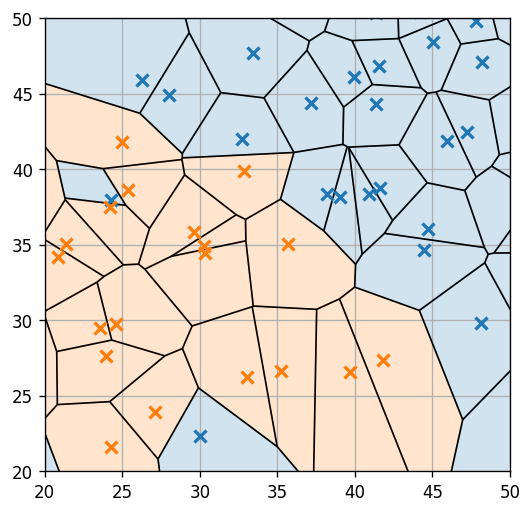

In [ ]:
## Import Voronoi and voronoi_plot_2d
from scipy.spatial import Voronoi, voronoi_plot_2d

# generate Voronoi tessellation
vor = Voronoi(x)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x[~y, 0], x[~y, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x[y, 0], x[y, 1], 'x', label='Fraud', ms=7, mew=2)
voronoi_plot_2d(ax=ax, vor=vor, show_points=False, show_vertices=False, s=1)
ax.set_xlim([20, 50])
ax.set_ylim([20, 50])

vor = Voronoi(x)

for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=(plt.cm.tab10(1) if y[r] else plt.cm.tab10(0)), alpha=0.2)
fig.savefig('./output/transactions_voronoi.png', dpi=240)

### Non equal components

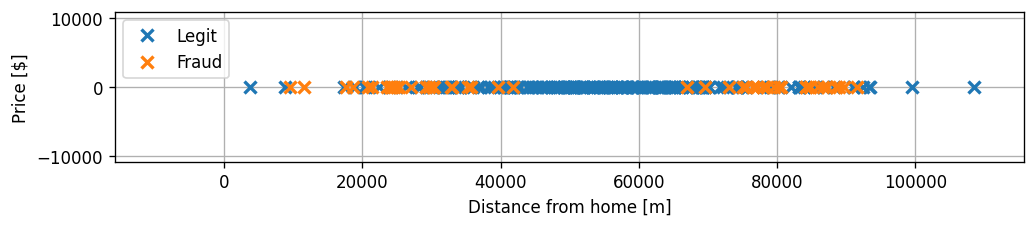

In [ ]:
fig, ax = plt.subplots(figsize=(9, 2))
ax.plot(x[~y, 0] * 1000, x[~y, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x[y, 0] * 1000, x[y, 1], 'x', label='Fraud', ms=7, mew=2)
ax.set_xlabel('Distance from home [m]')
ax.set_ylabel('Price [$]')
ax.axis('equal')
ax.set_xlim(0, 100000)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
fig.savefig('./output/transactions_non_equal.png', dpi=240)

### Test

The test score is 0.120

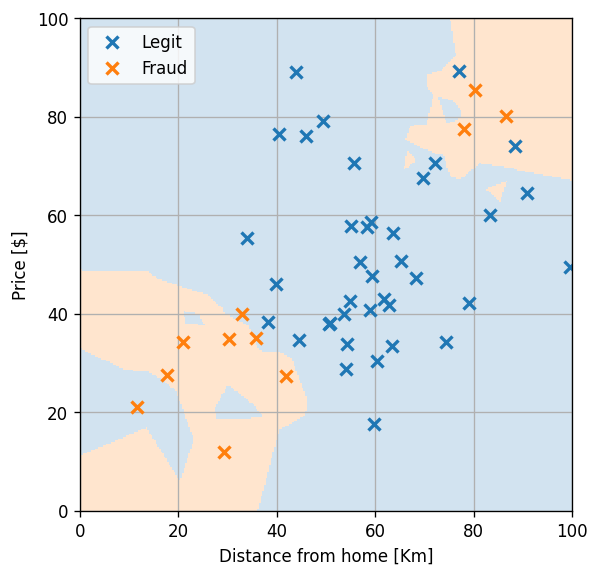

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_test[~y_test, 0], x_test[~y_test, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_test[y_test, 0], x_test[y_test, 1], 'x', label='Fraud', ms=7, mew=2)
plot_grid_predict(ax, h, x_grid)
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
fig.savefig('./output/transactions_1_nn_test.png', dpi=240)

y_hat = h(x_test)
test_score = (y_hat != y_test).mean()

display(Markdown(f'The test score is {test_score:.3f}'))

## 5-NN

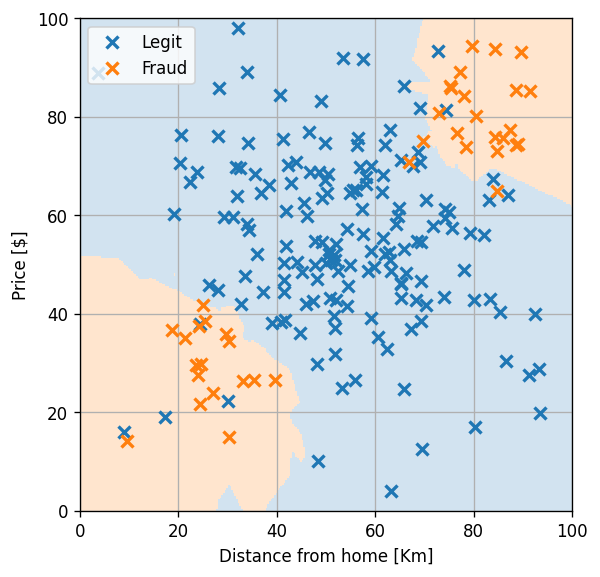

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
h = lambda x: knn.predict(x)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_train[~y_train, 0], x_train[~y_train, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_train[y_train, 0], x_train[y_train, 1], 'x', label='Fraud', ms=7, mew=2)
plot_grid_predict(ax, h, x_grid)

ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
fig.savefig('./output/transactions_5_nn.png', dpi=240)

### Test

The test score is 0.100

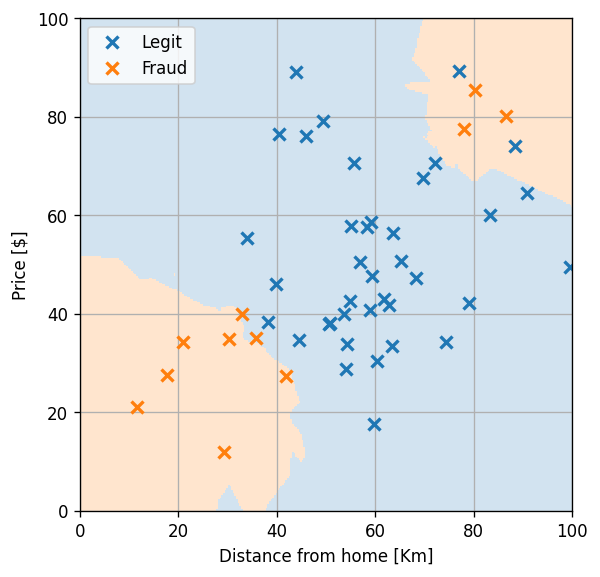

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_test[~y_test, 0], x_test[~y_test, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_test[y_test, 0], x_test[y_test, 1], 'x', label='Fraud', ms=7, mew=2)
plot_grid_predict(ax, h, x_grid)
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
fig.savefig('./output/transactions_5_nn_test.png', dpi=240)

y_hat = h(x_test)
test_score = (y_hat != y_test).mean()

display(Markdown(f'The test score is {test_score:.3f}'))

### Train-Validation Split

In [ ]:
## Generating a vector of indices
indices = train_indices.copy()

## Shuffle the indices
rand_gen = np.random.RandomState(9)
rand_gen.shuffle(indices)

## Split the indices into 75% train / 25% validation
n_samples_train2 = int(n_samples_train * 0.75)
train2_indices = indices[:n_samples_train2]
val_indices = indices[n_samples_train2:]

x_train2 = x[train2_indices]
y_train2 = y[train2_indices]

x_val = x[val_indices]
y_val = y[val_indices]

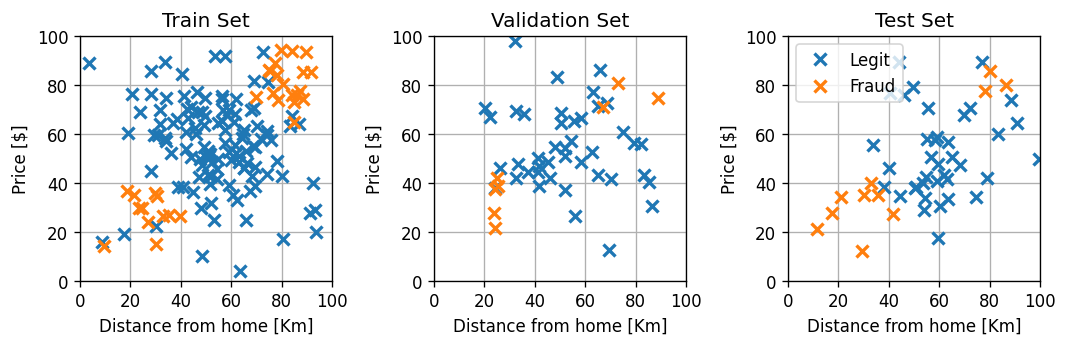

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

ax = axes[0]
ax.plot(x_train2[~y_train2, 0], x_train2[~y_train2, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_train2[y_train2, 0], x_train2[y_train2, 1], 'x', label='Fraud', ms=7, mew=2)
ax.set_title('Train Set')
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()

ax = axes[1]
ax.plot(x_val[~y_val, 0], x_val[~y_val, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_val[y_val, 0], x_val[y_val, 1], 'x', label='Fraud', ms=7, mew=2)
ax.set_title('Validation Set')
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()

ax = axes[2]
ax.plot(x_test[~y_test, 0], x_test[~y_test, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_test[y_test, 0], x_test[y_test, 1], 'x', label='Fraud', ms=7, mew=2)
ax.set_title('Test Set')
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()

ax.legend(loc='upper left')
fig.savefig('./output/transactions_train_val_test.png', dpi=240)

### Selecting $K$

In [ ]:
k_list = np.arange(1, 40)
train_scores = {}
val_scores = {}

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train2, y_train2)

    y_hat = knn.predict(x_train2)
    train_scores[k] = (y_hat != y_train2).mean()

    y_hat = knn.predict(x_val)
    val_scores[k] = (y_hat != y_val).mean()

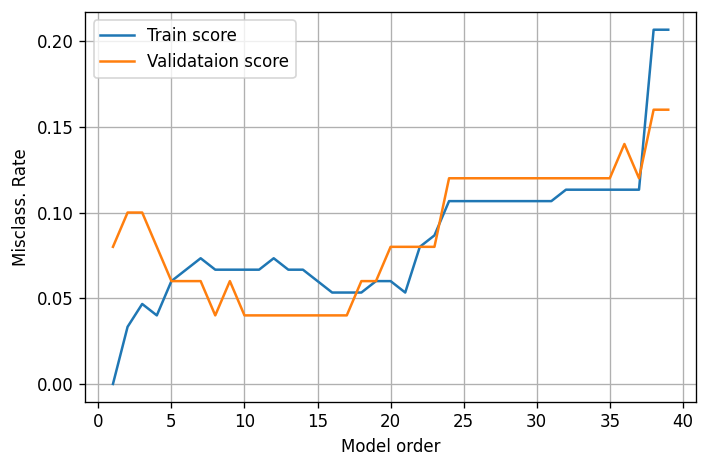

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(k_list, [train_scores[k] for k in k_list], label='Train score')
ax.plot(k_list, [val_scores[k] for k in k_list], label='Validataion score')
ax.set_xlabel('Model order')
ax.set_ylabel('Misclass. Rate')
# ax.set_ylim(5, 6)
plt.tight_layout()
ax.legend();
fig.savefig('./output/transactions_k_sweep.png', dpi=240)

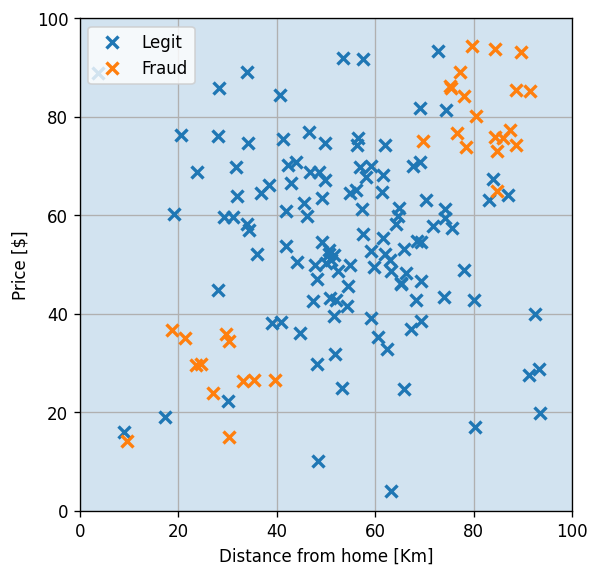

In [ ]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(x_train2, y_train2)
h = lambda x: knn.predict(x)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_train2[~y_train2, 0], x_train2[~y_train2, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_train2[y_train2, 0], x_train2[y_train2, 1], 'x', label='Fraud', ms=7, mew=2)
plot_grid_predict(ax, h, x_grid)

ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
fig.savefig('./output/transactions_40_nn.png', dpi=240)

The test score is 0.100

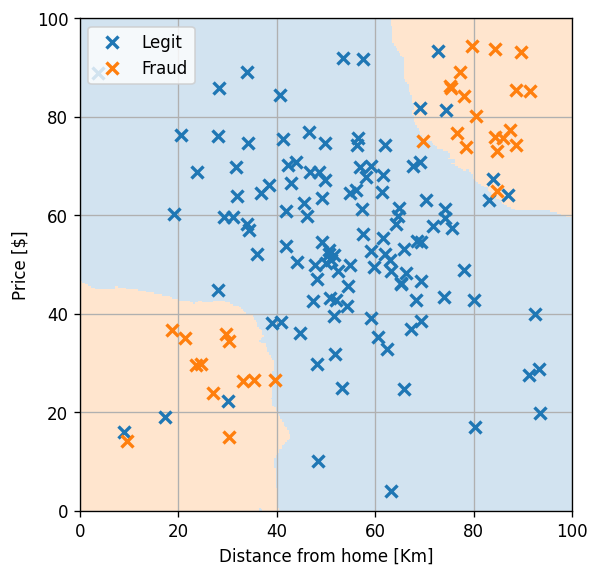

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train2, y_train2)
h = lambda x: knn.predict(x)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_train2[~y_train2, 0], x_train2[~y_train2, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_train2[y_train2, 0], x_train2[y_train2, 1], 'x', label='Fraud', ms=7, mew=2)
plot_grid_predict(ax, h, x_grid)

ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
# fig.savefig('./output/transactions_13_nn.png', dpi=240)

y_hat = h(x_test)
test_score = (y_hat != y_test).mean()

display(Markdown(f'The test score is {test_score:.3f}'))

## Decision Tree

In [ ]:
node_style = {
    'style': 'filled',
    'fillcolor': '#DAE8FC',
    'color': '#6C8EBF',
    'penwidth': '3'
    }
edge_style = {
    'penwidth': '2'
    }

current_node_style = node_style.copy()
current_node_style.update({
    'fillcolor': '#D5E8D4',
    'color': '#82B366',
    'shape': 'ellipse',
    })

### Misclassification rate

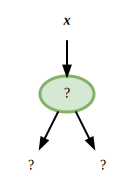

'./output/transactions_node1_select.png'

In [ ]:
tree_graph = Digraph(comment='Tree')
tree_graph.format = 'png'
tree_graph.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree_graph.edge('root', 'node_1', **edge_style)
tree_graph.node('node_1', '?', **current_node_style)
tree_graph.edge('node_1', 'leaf_1_1', '', **edge_style)
tree_graph.node('leaf_1_1', '?', shape='plaintext')
tree_graph.edge('node_1', 'leaf_1_2', '', **edge_style)
tree_graph.node('leaf_1_2', '?', shape='plaintext')

display(tree_graph)
tree_graph.render(f'./output/transactions_node1_select')

75.07823623988939 0.15999999999999998
93.71041272373732 0.19333333333333333


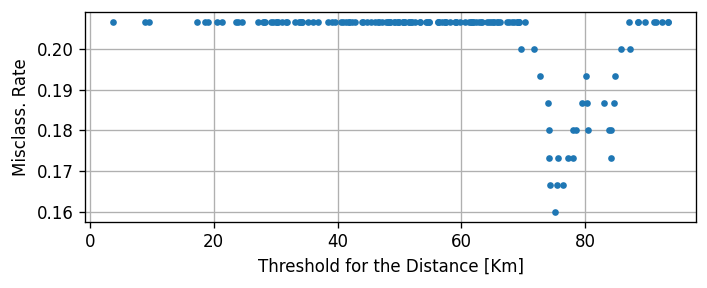

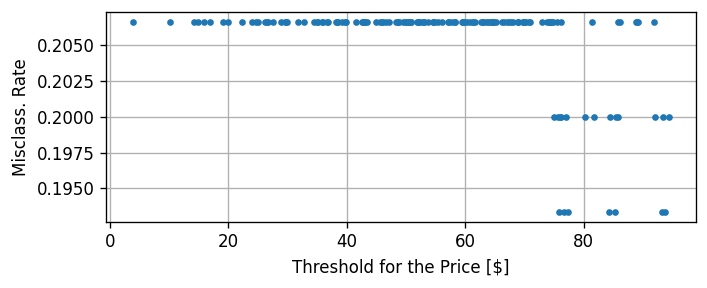

In [ ]:
def calc_misclass(y_per_leaf, n_total):
    total_score = 0
    for y in y_per_leaf:
        n_leaf = len(y)
        if n_leaf == 0:
            continue
        p = y.mean()
        leaf_score = 1 - max(p, (1 - p))
        total_score += leaf_score * n_leaf / n_total
    return total_score

scores = np.zeros(x_train2.shape[0])
for i, value in enumerate(x_train2[:, 0]):
    y_per_leaf = [
        y_train2[x_train2[:, 0] < value],
        y_train2[x_train2[:, 0] >= value],
        ]
    scores[i] = calc_misclass(y_per_leaf, x_train2.shape[0])

fig, ax = plt.subplots(figsize=(6, 2.5))
ax.plot(x_train2[:, 0], scores, '.')
ax.set_xlabel('Threshold for the Distance [Km]')
ax.set_ylabel('Misclass. Rate')
plt.tight_layout()
fig.savefig('./output/transactions_dist_threshold.png', dpi=240)

best_point = np.argmin(scores)
print(x_train2[best_point, 0], scores[best_point])

scores = np.zeros(x_train2.shape[0])
for i, value in enumerate(x_train2[:, 1]):
    y_per_leaf = [
        y_train2[x_train2[:, 1] < value],
        y_train2[x_train2[:, 1] >= value],
        ]
    scores[i] = calc_misclass(y_per_leaf, x_train2.shape[0])

fig, ax = plt.subplots(figsize=(6, 2.5))
ax.plot(x_train2[:, 1], scores, '.')
ax.set_xlabel('Threshold for the Price [$]')
ax.set_ylabel('Misclass. Rate')
plt.tight_layout()
fig.savefig('./output/transactions_price_threshold.png', dpi=240)

best_point = np.argmin(scores)
print(x_train2[best_point, 1], scores[best_point])

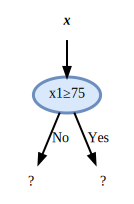

Left leaf: 13-108 (fraud-legit)
Right leaf: 18-11 (fraud-legit)


In [ ]:
tree_graph = Digraph(comment='Tree')
tree_graph.format = 'png'
tree_graph.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree_graph.edge('root', 'node_1', **edge_style)
tree_graph.node('node_1', '<x<SUB>1</SUB>≥75>', **node_style)
tree_graph.edge('node_1', 'leaf_1_1', 'No', **edge_style)
tree_graph.node('leaf_1_1', '?', shape='plaintext')
tree_graph.edge('node_1', 'leaf_1_2', 'Yes', **edge_style)
tree_graph.node('leaf_1_2', '?', shape='plaintext')

display(tree_graph)
tree_graph.render(f'./output/transactions_node1_no_leaf')

print(f'Left leaf: {y_train2[x_train2[:, 0] < 75].sum()}-{(~y_train2[x_train2[:, 0] < 75]).sum()} (fraud-legit)')
print(f'Right leaf: {y_train2[x_train2[:, 0] >= 75].sum()}-{(~y_train2[x_train2[:, 0] >= 75]).sum()} (fraud-legit)')

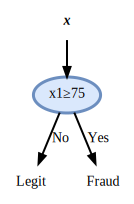

'./output/transactions_node1.png'

In [ ]:
tree_graph = Digraph(comment='Tree')
tree_graph.format = 'png'
tree_graph.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree_graph.edge('root', 'node_1', **edge_style)
tree_graph.node('node_1', '<x<SUB>1</SUB>≥75>', **node_style)
tree_graph.edge('node_1', 'leaf_1_1', 'No', **edge_style)
tree_graph.node('leaf_1_1', 'Legit', shape='plaintext')
tree_graph.edge('node_1', 'leaf_1_2', 'Yes', **edge_style)
tree_graph.node('leaf_1_2', 'Fraud', shape='plaintext')

display(tree_graph)
tree_graph.render(f'./output/transactions_node1')

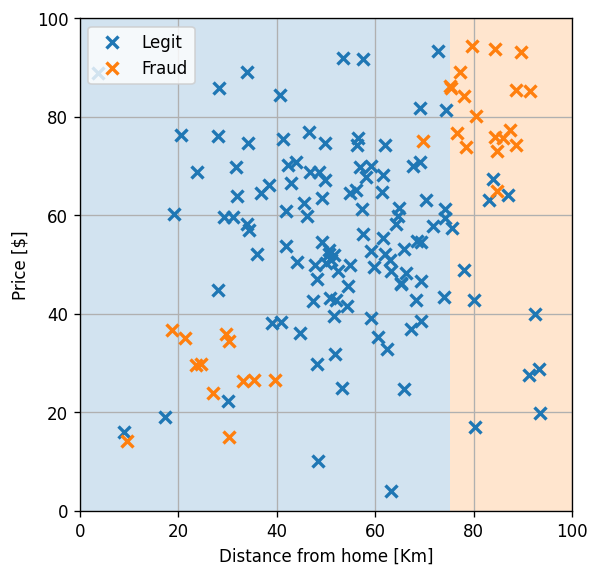

In [ ]:
h = lambda x: x[:, 0] >= 75

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_train2[~y_train2, 0], x_train2[~y_train2, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_train2[y_train2, 0], x_train2[y_train2, 1], 'x', label='Fraud', ms=7, mew=2)
plot_grid_predict(ax, h, x_grid)
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
fig.savefig('./output/transactions_node1_predict.png', dpi=240)

### Homogeneity

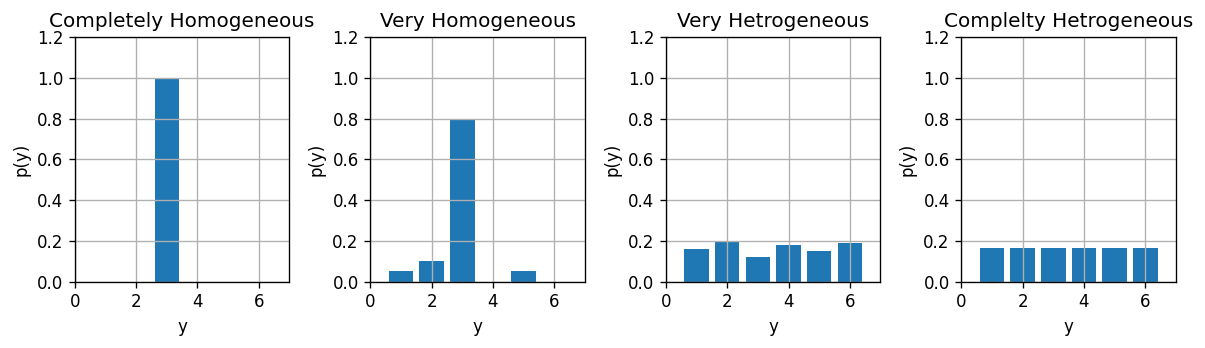

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

ax= axes[0]
ax.bar([1, 2, 3, 4, 5, 6], [0,0,1,0,0,0])
ax.set_xlabel('y')
ax.set_ylabel('p(y)')
ax.set_title('Completely Homogeneous')
ax.set_xlim(0, 7)
ax.set_ylim(0, 1.2)
plt.tight_layout()

ax= axes[1]
ax.bar([1, 2, 3, 4, 5, 6], [0.05,0.1,0.8,0,0.05,0])
ax.set_xlabel('y')
ax.set_ylabel('p(y)')
ax.set_title('Very Homogeneous')
ax.set_xlim(0, 7)
ax.set_ylim(0, 1.2)
plt.tight_layout()

ax= axes[2]
ax.bar([1, 2, 3, 4, 5, 6], [0.16,0.2,0.12,0.18,0.15,0.19])
ax.set_xlabel('y')
ax.set_ylabel('p(y)')
ax.set_title('Very Hetrogeneous')
ax.set_xlim(0, 7)
ax.set_ylim(0, 1.2)
plt.tight_layout()

ax= axes[3]
ax.bar([1, 2, 3, 4, 5, 6], [1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6])
ax.set_xlabel('y')
ax.set_ylabel('p(y)')
ax.set_title('Complelty Hetrogeneous')
ax.set_xlim(0, 7)
ax.set_ylim(0, 1.2)
plt.tight_layout()
fig.savefig('./output/homogeneity.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


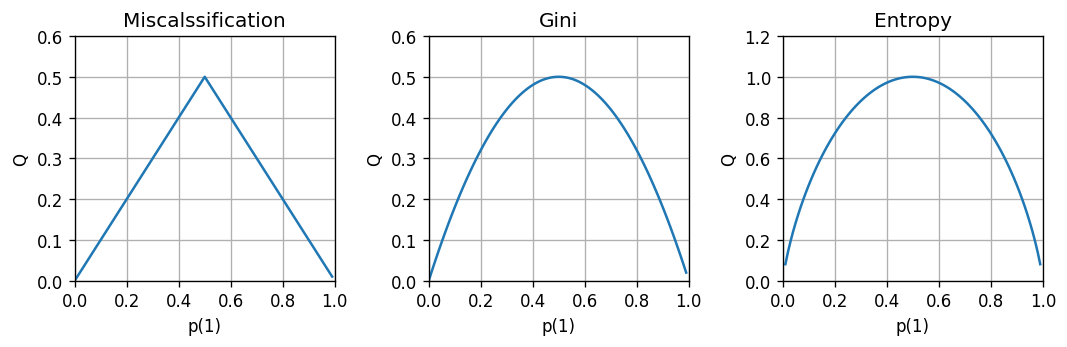

In [ ]:
y_grid = np.arange(0, 1, 0.01)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

ax= axes[0]
ax.plot(y_grid, 1 - np.maximum(y_grid, 1 - y_grid))
ax.set_xlabel('p(1)')
ax.set_ylabel('Q')
ax.set_title('Miscalssification')
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.6)
plt.tight_layout()

ax= axes[1]
ax.plot(y_grid, 2 * y_grid * (1 - y_grid))
ax.set_xlabel('p(1)')
ax.set_ylabel('Q')
ax.set_title('Gini')
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.6)
plt.tight_layout()

ax= axes[2]
ax.plot(y_grid, -y_grid * np.log2(y_grid) - (1 - y_grid) * np.log2(1 - y_grid))
ax.set_xlabel('p(1)')
ax.set_ylabel('Q')
ax.set_title('Entropy')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.2)
plt.tight_layout()
fig.savefig('./output/hetrogeneity_metrics.png')

### Gini

75.07823623988939 0.24574522656027362
72.97292842296525 0.2735672514619883


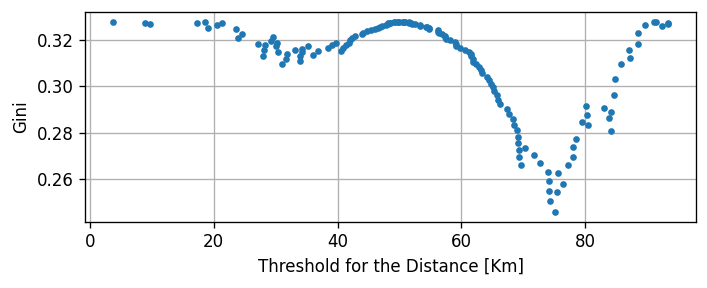

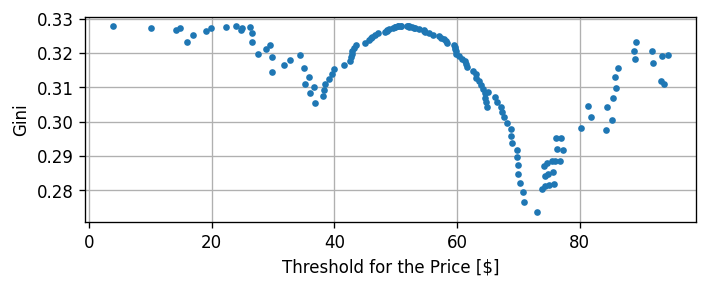

In [ ]:
def calc_gini(y_per_leaf, n_total):
    total_score = 0
    for y in y_per_leaf:
        n_leaf = len(y)
        if n_leaf == 0:
            continue
        p = y.mean()
        leaf_score = 2 * p * (1 - p)
        total_score += leaf_score * n_leaf / n_total
    return total_score
scores = np.zeros(x_train2.shape[0])
for i, value in enumerate(x_train2[:, 0]):
    y_per_leaf = [
        y_train2[x_train2[:, 0] < value],
        y_train2[x_train2[:, 0] >= value],
        ]
    scores[i] = calc_gini(y_per_leaf, x_train2.shape[0])

fig, ax = plt.subplots(figsize=(6, 2.5))
ax.plot(x_train2[:, 0], scores, '.')
ax.set_xlabel('Threshold for the Distance [Km]')
ax.set_ylabel('Gini')
plt.tight_layout()
fig.savefig('./output/transactions_dist_threshold_gini.png', dpi=240)

best_point = np.argmin(scores)
print(x_train2[best_point, 0], scores[best_point])

scores = np.zeros(x_train2.shape[0])
for i, value in enumerate(x_train2[:, 1]):
    y_per_leaf = [
        y_train2[x_train2[:, 1] < value],
        y_train2[x_train2[:, 1] >= value],
        ]
    scores[i] = calc_gini(y_per_leaf, x_train2.shape[0])

fig, ax = plt.subplots(figsize=(6, 2.5))
ax.plot(x_train2[:, 1], scores, '.')
ax.set_xlabel('Threshold for the Price [$]')
ax.set_ylabel('Gini')
plt.tight_layout()
fig.savefig('./output/transactions_price_threshold_gini.png', dpi=240)

best_point = np.argmin(scores)
print(x_train2[best_point, 1], scores[best_point])

In [ ]:
class Node:
    def __init__(self):
        self.is_leaf = True
        
        self.prediction = None
        
        self.field = None
        self.threshold = None
        self.true_node = None
        self.false_node = None
    
    def grow(self, x, y, depth):
        values, unique_counts = np.unique(y, return_counts=True)
        self.prediction = values[np.argmax(unique_counts)]
        if depth > 0:
            score_before = calc_gini([y], x.shape[0])
            scores = np.zeros(x.shape)
            for i in range(x.shape[0]):
                for j in range(x.shape[1]):
                    y_per_leaf = [
                        y[x[:, j] < x[i, j]],
                        y[x[:, j] >= x[i, j]],
                        ]
                    scores[i, j] = calc_gini(y_per_leaf, x.shape[0])

            self.field = np.argmin(np.min(scores, axis=0))
            best_point = np.argmin(scores[:, self.field])
            self.threshold = x[best_point, self.field]
            true_indices, false_indices = self._get_split(x)

            if ((scores[best_point, self.field] < score_before)
                    and true_indices.any()
                    and false_indices.any()):
                self.is_leaf = False
                self.true_node = Node()
                self.true_node.grow(x[true_indices], y[true_indices], depth - 1)
                self.false_node = Node()
                self.false_node.grow(x[false_indices], y[false_indices], depth - 1)
    
    def prune(self, x, y):
        if not self.is_leaf:
            true_indices, false_indices = self._get_split(x)
            if (not true_indices.any()) or (not false_indices.any()):
                self.is_leaf = True
            else:
                self.true_node.prune(x[true_indices], y[true_indices])
                self.false_node.prune(x[false_indices], y[false_indices])

                if self.true_node.is_leaf and self.false_node.is_leaf:
                    score_without = (y != self.prediction).mean()
                    score = (self.predict(x) != y).mean()
                    if score >= score_without:
                        self.is_leaf = True
    
    def _get_split(self, x):
        true_indices = x[:, self.field] >= self.threshold
        false_indices = x[:, self.field] < self.threshold
        return true_indices, false_indices
    
    def predict(self, x):
        if self.is_leaf:
            y_hat = np.ones(x.shape[0], dtype=type(self.prediction)) * self.prediction
        else:
            true_indices, false_indices = self._get_split(x)
            y_hat_true = self.true_node.predict(x[true_indices])
            y_hat_false = self.false_node.predict(x[false_indices])
            
            y_hat = np.zeros(x.shape[0], dtype=y_hat_true.dtype)
            y_hat[true_indices] = y_hat_true
            y_hat[false_indices] = y_hat_false
        return y_hat

In [ ]:
def add_node_to_tree(tree_graph, node, index):
    if node.is_leaf:
        tree_graph.node(index, f'{node.prediction}', shape='plaintext')
    else:
        node_text = f'<x<SUB>{node.field + 1}</SUB>≥{node.threshold:.0f}>'
        tree_graph.node(index, node_text, **node_style)
        tree_graph.edge(index, index + '_0', 'No', **edge_style)
        add_node_to_tree(tree_graph, node.false_node, index + '_0')
        tree_graph.edge(index, index + '_1', 'Yes', **edge_style)
        add_node_to_tree(tree_graph, node.true_node, index + '_1')
    
def gen_tree_graph(node):
    tree_graph = Digraph(comment='Tree')
    tree_graph.format = 'png'
    tree_graph.node('root', '<<I><B>x</B></I>>', shape='plaintext')
    tree_graph.edge('root', 'node', **edge_style)
    add_node_to_tree(tree_graph, node, 'node')
    return tree_graph

In [ ]:
depth_list = range(1, 8)
train_scores = {}
val_scores = {}

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_train2[~y_train2, 0], x_train2[~y_train2, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_train2[y_train2, 0], x_train2[y_train2, 1], 'x', label='Fraud', ms=7, mew=2)
title = ax.set_title('')
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
img_obj = plot_grid_predict(ax, h, x_grid)

tree_graph_imgs = []
predict_imgs = []
for depth in depth_list:
    
    tree = Node()
    tree.grow(x_train2, y_train2, depth)
    tree_graph = gen_tree_graph(tree)
    # display(tree_graph)
    # tree_graph.render(f'./output/transactions_depth_{depth}')
    tree_graph.render(f'/tmp/tmp_img')
    tree_graph_imgs.append(imageio.imread('/tmp/tmp_img.png')[:, :, :3])

    h = lambda x: tree.predict(x)
    img_obj.remove()
    img_obj = plot_grid_predict(ax, h, x_grid)
    title.set_text(f'Depth = {depth}')
    fig.canvas.draw()
    # fig.savefig(f'./output/transactions_prediction_depth_{depth}.png', dpi=240)
    predict_imgs.append(np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape(*fig.canvas.get_width_height(), 3))

tree_graph.render(f'./output/transactions_tree')
shape = tree_graph_imgs[-1].shape
for i in range(len(tree_graph_imgs) - 1):
    shape_cur = tree_graph_imgs[i].shape
    padding = (
        (int(np.floor((shape[0] - shape_cur[0]) / 2)),
         int(np.ceil((shape[0] - shape_cur[0]) / 2))),
        (int(np.floor((shape[1] - shape_cur[1]) / 2)),
         int(np.ceil((shape[1] - shape_cur[1]) / 2))),
        (0, 0))
    tree_graph_imgs[i] = np.pad(tree_graph_imgs[i], padding, constant_values=255)

for _ in range(5):
    tree_graph_imgs.append(tree_graph_imgs[-1])
    predict_imgs.append(predict_imgs[-1])
imageio.mimsave('./output/transactions_depth.gif', tree_graph_imgs, fps=1)
imageio.mimsave('./output/transactions_prediction_depth.gif', predict_imgs, fps=1)

plt.close(fig)
display(HTML('<img src="./output/transactions_depth.gif"/>'))
display(HTML('<img src="./output/transactions_prediction_depth.gif"/>'))


The test score is 0.140

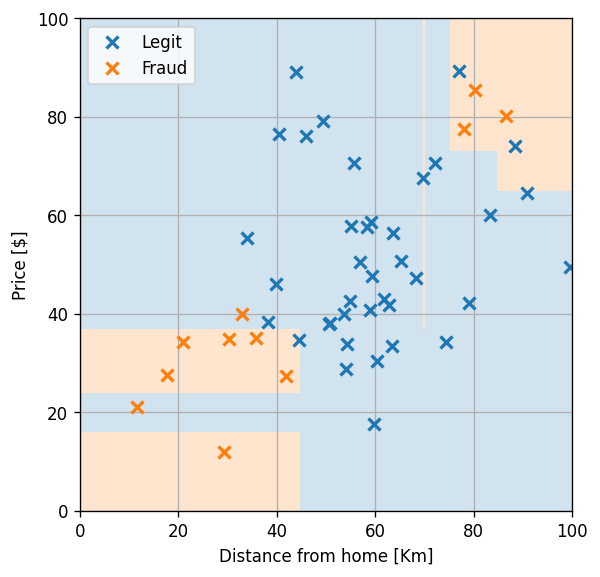

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_test[~y_test, 0], x_test[~y_test, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_test[y_test, 0], x_test[y_test, 1], 'x', label='Fraud', ms=7, mew=2)
plot_grid_predict(ax, h, x_grid)
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
fig.savefig('./output/transactions_tree_test.png', dpi=240)

y_hat = h(x_test)
test_score = (y_hat != y_test).mean()

display(Markdown(f'The test score is {test_score:.3f}'))

In [ ]:
y_hat = h(x_test)
test_score = (y_hat != y_test).mean()
display(Markdown(f'The test score is {test_score:.3f}'))

The test score is 0.140

## Pruning

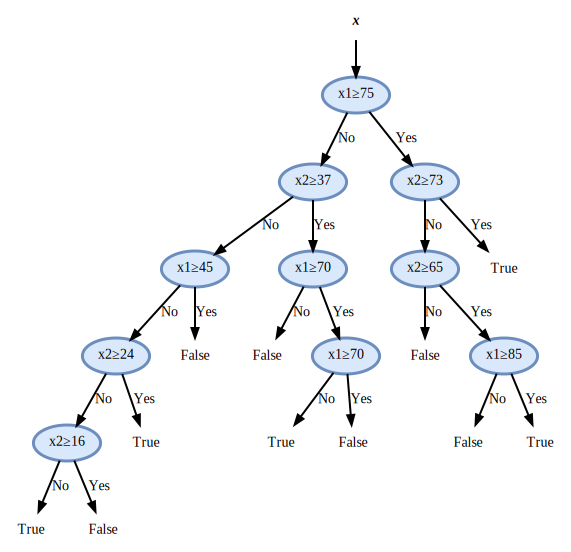

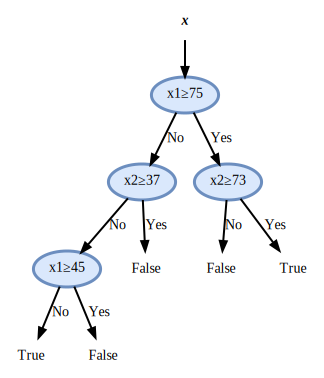

The test score is 0.080

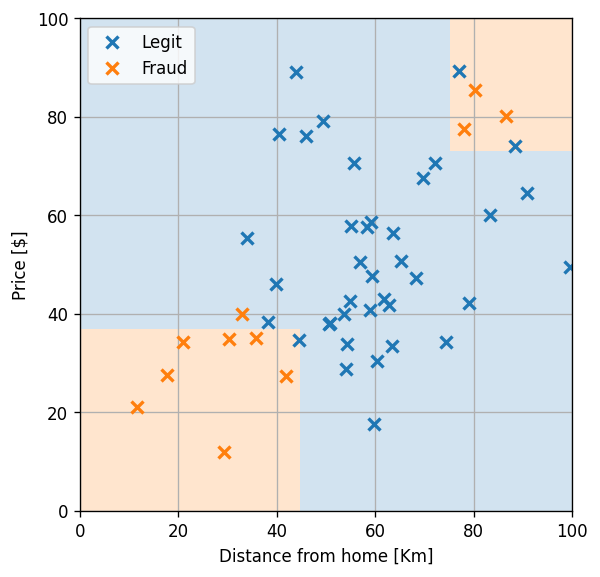

In [ ]:
tree_graph = gen_tree_graph(tree)
display(tree_graph)

tree.prune(x_val, y_val)

tree_graph = gen_tree_graph(tree)
display(tree_graph)
tree_graph.render(f'./output/transactions_pruning')

h = lambda x: tree.predict(x)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_test[~y_test, 0], x_test[~y_test, 1], 'x', label='Legit', ms=7, mew=2)
ax.plot(x_test[y_test, 0], x_test[y_test, 1], 'x', label='Fraud', ms=7, mew=2)
plot_grid_predict(ax, h, x_grid)
ax.set_xlabel('Distance from home [Km]')
ax.set_ylabel('Price [$]')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.tight_layout()
ax.legend(loc='upper left')
fig.savefig('./output/transactions_pruning_test.png', dpi=240)

y_hat = h(x_test)
test_score = (y_hat != y_test).mean()

display(Markdown(f'The test score is {test_score:.3f}'))
